# Import Library

In [3]:
import pandas as pd
import numpy as np

# Import Dataset

In [4]:
progress = pd.read_csv('./data/Resource Data Learning Buddy - Student Progress.csv')

# Exploatory Data

In [5]:
progress.head()

,name,email,course_name,active_tutorials,completed_tutorials,is_graduated,already_generated_certificate,final_submission_id,submission_rating,final_exam_id,exam_score
0,Dina Wijaya,dina.wijaya1@example.com,Belajar Membangun Aplikasi Android Native Bagi...,4,0,0,0,4,NaN,NaN,NaN
1,Irfan Halim,irfan.halim2@example.com,Belajar Membangun Aplikasi dengan Universal Wi...,10,0,0,0,76,NaN,NaN,NaN
2,Hana Pratama,hana.pratama3@example.com,Belajar Fundamental Aplikasi Android,107,1,0,0,"1,099",NaN,163,NaN
3,Dina Utama,dina.utama4@example.com,Belajar Fundamental Aplikasi Android,107,0,0,0,"1,099",NaN,163,NaN
4,Rafi Santoso,rafi.santoso5@example.com,Belajar Fundamental Aplikasi Android,107,55,0,0,"1,099",NaN,163,NaN


In [6]:
progress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           271 non-null    object 
 1   email                          271 non-null    object 
 2   course_name                    271 non-null    object 
 3   active_tutorials               271 non-null    int64  
 4   completed_tutorials            271 non-null    int64  
 5   is_graduated                   271 non-null    int64  
 6   already_generated_certificate  271 non-null    int64  
 7   final_submission_id            132 non-null    object 
 8   submission_rating              53 non-null     float64
 9   final_exam_id                  254 non-null    object 
 10  exam_score                     127 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 23.4+ KB


In [7]:
progress.isna().sum()

name                               0
email                              0
course_name                        0
active_tutorials                   0
completed_tutorials                0
is_graduated                       0
already_generated_certificate      0
final_submission_id              139
submission_rating                218
final_exam_id                     17
exam_score                       144
dtype: int64

In [8]:
progress.describe()

,active_tutorials,completed_tutorials,is_graduated,already_generated_certificate,submission_rating,exam_score
count,271.000000,271.000000,271.000000,271.000000,53.000000,127.000000
mean,68.202952,51.428044,0.494465,0.594096,4.150943,87.897638
std,44.701472,61.022229,0.500894,5.856099,0.841158,16.735968
min,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,38.000000,2.500000,0.000000,0.000000,4.000000,85.000000
50%,69.000000,39.000000,0.000000,0.000000,4.000000,92.000000
75%,107.000000,77.000000,1.000000,0.000000,5.000000,100.000000
max,189.000000,452.000000,1.000000,75.000000,5.000000,100.000000


In [9]:
df_copy = progress.copy()

In [10]:
df_copy['submission_rating'] = df_copy['submission_rating'].fillna(df_copy['submission_rating'].mean())
df_copy['final_submission_id'] = df_copy['final_submission_id'].fillna(df_copy['submission_rating'].mean())
df_copy['exam_score'] = df_copy['exam_score'].fillna(df_copy['submission_rating'].mean())
df_copy['final_exam_id'] = df_copy['final_exam_id'].fillna(df_copy['final_exam_id'].mode()[0])

In [11]:
df_copy.isna().sum()

name                             0
email                            0
course_name                      0
active_tutorials                 0
completed_tutorials              0
is_graduated                     0
already_generated_certificate    0
final_submission_id              0
submission_rating                0
final_exam_id                    0
exam_score                       0
dtype: int64

In [12]:
df_copy.head()

,name,email,course_name,active_tutorials,completed_tutorials,is_graduated,already_generated_certificate,final_submission_id,submission_rating,final_exam_id,exam_score
0,Dina Wijaya,dina.wijaya1@example.com,Belajar Membangun Aplikasi Android Native Bagi...,4,0,0,0,4,4.150943,163,4.150943
1,Irfan Halim,irfan.halim2@example.com,Belajar Membangun Aplikasi dengan Universal Wi...,10,0,0,0,76,4.150943,163,4.150943
2,Hana Pratama,hana.pratama3@example.com,Belajar Fundamental Aplikasi Android,107,1,0,0,"1,099",4.150943,163,4.150943
3,Dina Utama,dina.utama4@example.com,Belajar Fundamental Aplikasi Android,107,0,0,0,"1,099",4.150943,163,4.150943
4,Rafi Santoso,rafi.santoso5@example.com,Belajar Fundamental Aplikasi Android,107,55,0,0,"1,099",4.150943,163,4.150943


# Feature Engineering

In [13]:
df_clean = df_copy.copy()

df_clean['completion_rate'] = df_clean['completed_tutorials'] / df_clean['active_tutorials']
df_clean['final_weighted_score'] = (df_clean['submission_rating'] * 0.5) + (df_clean['exam_score'] * 0.5)


In [14]:
df_clean.head()

,name,email,course_name,active_tutorials,completed_tutorials,is_graduated,already_generated_certificate,final_submission_id,submission_rating,final_exam_id,exam_score,completion_rate,final_weighted_score
0,Dina Wijaya,dina.wijaya1@example.com,Belajar Membangun Aplikasi Android Native Bagi...,4,0,0,0,4,4.150943,163,4.150943,0.000000,4.150943
1,Irfan Halim,irfan.halim2@example.com,Belajar Membangun Aplikasi dengan Universal Wi...,10,0,0,0,76,4.150943,163,4.150943,0.000000,4.150943
2,Hana Pratama,hana.pratama3@example.com,Belajar Fundamental Aplikasi Android,107,1,0,0,"1,099",4.150943,163,4.150943,0.009346,4.150943
3,Dina Utama,dina.utama4@example.com,Belajar Fundamental Aplikasi Android,107,0,0,0,"1,099",4.150943,163,4.150943,0.000000,4.150943
4,Rafi Santoso,rafi.santoso5@example.com,Belajar Fundamental Aplikasi Android,107,55,0,0,"1,099",4.150943,163,4.150943,0.514019,4.150943


In [15]:
df_clean.describe()

,active_tutorials,completed_tutorials,is_graduated,already_generated_certificate,submission_rating,exam_score,completion_rate,final_weighted_score
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,68.202952,51.428044,0.494465,0.594096,4.150943,43.397549,0.750450,23.774246
std,44.701472,61.022229,0.500894,5.856099,0.369145,43.401103,0.664009,21.710520
min,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.075472
25%,38.000000,2.500000,0.000000,0.000000,4.150943,4.150943,0.184242,4.150943
50%,69.000000,39.000000,0.000000,0.000000,4.150943,4.150943,0.870229,4.150943
75%,107.000000,77.000000,1.000000,0.000000,4.150943,90.000000,1.000000,47.287736
max,189.000000,452.000000,1.000000,75.000000,5.000000,100.000000,3.450382,52.500000


In [16]:

def define_level(row):
    score = row['final_weighted_score']
    completion = row['completion_rate']
    
    # Rule 1: Advanced (Mastery)
    # Syarat: Materi selesai > 90% DAN Nilai rata-rata > 85
    if completion >= 0.9 and score >= 23:
        return 2 # Representasi 'Advanced'
    
    # Rule 2: Intermediate (Competent)
    # Syarat: Materi selesai > 50% DAN Nilai rata-rata > 60 (Lulus minimal)
    elif completion >= 0.5 and score >= 21:
        return 1 # Representasi 'Intermediate'
    
    # Rule 3: Beginner (Novice / In-progress)
    # Sisanya dianggap beginner
    else:
        return 0 # Representasi 'Beginner'

# Terapkan fungsi labeling
df_clean['competency_level'] = df_clean.apply(define_level, axis=1)

In [22]:
df_clean.columns.tolist()

['name',
 'email',
 'course_name',
 'active_tutorials',
 'completed_tutorials',
 'is_graduated',
 'already_generated_certificate',
 'final_submission_id',
 'submission_rating',
 'final_exam_id',
 'exam_score',
 'completion_rate',
 'final_weighted_score',
 'competency_level']

# Feature Selcetion

In [25]:

features = ['completion_rate', 'submission_rating', 'exam_score']
target = 'competency_level'

final_dataset = df_clean[features + [target]]

print("\n--- Dataset Siap untuk Training (Supervised Learning) ---")
print(final_dataset.head())

print("\n--- Distribusi Label Kelas ---")
print(final_dataset['competency_level'].value_counts())


--- Dataset Siap untuk Training (Supervised Learning) ---
   completion_rate  submission_rating  exam_score  competency_level
0         0.000000           4.150943    4.150943                 0
1         0.000000           4.150943    4.150943                 0
2         0.009346           4.150943    4.150943                 0
3         0.000000           4.150943    4.150943                 0
4         0.514019           4.150943    4.150943                 0

--- Distribusi Label Kelas ---
competency_level
0    149
2    101
1     21
Name: count, dtype: int64


<Axes: title={'center': 'Distribusi Kelas Kompetensi'}, xlabel='competency_level'>

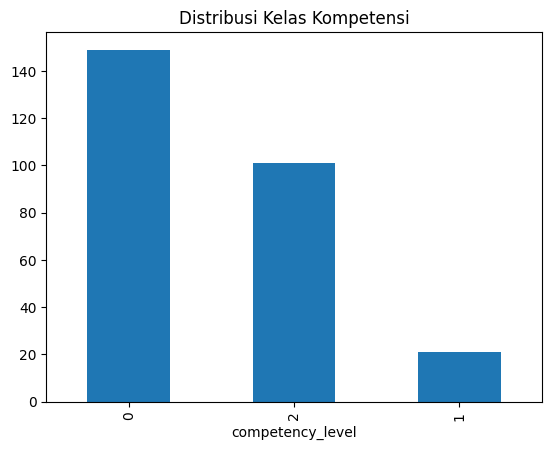

In [24]:
final_dataset['competency_level'].value_counts().plot(kind='bar', title='Distribusi Kelas Kompetensi')

In [26]:
final_dataset.to_csv('./data/output/learning_buddy_supervised_dataset.csv', index=False)